In [1]:
#Pandas is great for small or medium sized data set (million)

In [2]:
#Pros and cons of databases


#-big data sets cannot be loaded into memory so they can be analyzed elsewhere
#-queries are optimized

#-hard to write SQL queries for complex analysis
#-no data-visualization abilities

In [3]:
#big data workflow:

#database of Raw data: ( > 1 GB) <- process on disk
#then call query to get aggregated data (MB's), such as a Pandas dataframe
#fine analysis & visualization
#so far: we haven't compressed raw data sets

In [4]:
#============================================================================================================

In [5]:
#Connecting to databases from python

#SQLAlchemy package works no matter what backend of sql is

#pandas uses sqlalchemy to connect to sql databases
#know these 4 lines of code!

# from sqlalchemy import create_engine
# engine = create_engine('URL FOR DATABASE')

# import pandas as pd
# data = pd.read_sql("SQL QUERY HERE", engine)



In [6]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:////data/flights.db")

In [7]:
import pandas as pd
data = pd.read_sql("SELECT * FROM ontime LIMIT 5", engine) # must limit 5!!!!

In [8]:
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003,1955,2211,2225,WN,335,...,4,8,0,,0,NA,NA,NA,NA,NA
1,2008,1,3,4,754,735,1002,1000,WN,3231,...,5,10,0,,0,NA,NA,NA,NA,NA
2,2008,1,3,4,628,620,804,750,WN,448,...,3,17,0,,0,NA,NA,NA,NA,NA
3,2008,1,3,4,926,930,1054,1100,WN,1746,...,3,7,0,,0,NA,NA,NA,NA,NA
4,2008,1,3,4,1829,1755,1959,1925,WN,3920,...,3,10,0,,0,2,0,0,0,32


In [9]:
#Q:what day of week should i fly if i want to minimize delays
#A: Saturday is the best day to fly ; friday is the worst
query = '''

SELECT DayOfWeek, AVG(DepDelay)
FROM ontime
GROUP BY DayOfWeek
'''

data = pd.read_sql(query,engine)

In [10]:
data

,DayOfWeek,AVG(DepDelay)
0,1,10.238683
1,2,8.079349
2,3,8.907601
3,4,10.962130
4,5,12.111124
5,6,7.983254
6,7,10.427989


In [11]:
#Challenge: make a hist() of all departure delays
import matplotlib.pyplot as plt

%matplotlib inline

query = '''

SELECT DepDelay, COUNT(*)
FROM ontime
GROUP BY DepDelay
ORDER BY DepDelay
'''

data = pd.read_sql(query,engine)
data

,DepDelay,COUNT(*)
0,-1200,1
1,-1199,4
2,-1198,1
3,-1197,2
4,-1196,2
5,-1194,2
6,-1193,2
...,...,...
1598,1930,1
1599,1952,1


In [12]:
data['DepDelay'] = pd.to_numeric(data['DepDelay'], errors = 'coerce')

In [13]:
delays = data.set_index('DepDelay')


delays = delays[(delays.index > -120) & (delays.index < 360)]
delays.index = pd.cut(delays.index,30) # binning of data


In [14]:
delays.reset_index()

,index,COUNT(*)
0,"(-118.477, -102.1]",1
1,"(-118.477, -102.1]",1
2,"(-118.477, -102.1]",1
3,"(-118.477, -102.1]",1
4,"(-118.477, -102.1]",1
5,"(-118.477, -102.1]",1
6,"(-118.477, -102.1]",2
...,...,...
456,"(343.1, 359]",172
457,"(343.1, 359]",168


In [15]:
delays = delays.reset_index().groupby('index')['COUNT(*)'].sum() #groupby bins and sum the counts

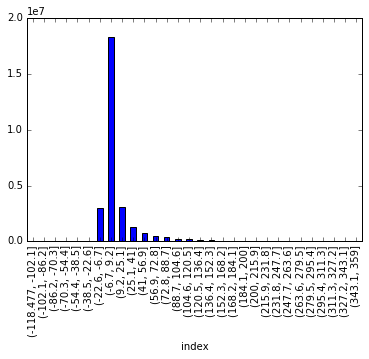

In [16]:
delays.plot.bar()

In [17]:
#Future of big data workflow